In [ ]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
print('Number of positive tweets :',len(pos_tweets))
print('Number of negative tweets : ',len(neg_tweets))

Number of positive tweets : 5000
Number of negative tweets :  5000


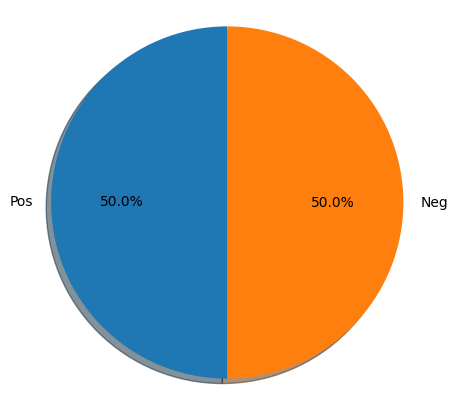

In [ ]:
fig = plt.figure(figsize = (5,5))

labels = 'Pos','Neg'
sizes = [len(pos_tweets), len(neg_tweets)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the chart
plt.show()

In [ ]:

print('\033[92m' + pos_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + neg_tweets[random.randint(0,5000)])

@Zendaya well, it happens :))
Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(


In [ ]:
#Data Preprocessing

In [ ]:
#Random Tweet
tweet = pos_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
#Downloading the stop words

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Data Preprocessing for the tweets include stopwords,stemming,tokenization

In [ ]:
import re
import string
from nltk.corpus import stopwords #module for the stop words from nltk
from nltk.stem import PorterStemmer #module for the stemming
from nltk.tokenize import TweetTokenizer #module for the tokenizing string

### Remove hyperlinks, Twitter marks and styles
Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the re library to perform regular expression operations on our tweet. We'll define our search pattern and use the sub() method to remove matches by substituting with an empty character (i.e. '')






In [ ]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [ ]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

#Iniate tokenzier class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)



My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


Tokenized string:
['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [ ]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english')

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)


Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [ ]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words:

learn
learning
learned
learnt
All these words are stemmed from its common root learn. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, happi and sunni. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

happy
happiness
happier
We can see that the prefix happi is more commonly used. We cannot choose happ because it is the stem of unrelated words like happen.

In [ ]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer()

# Create an empty list to store the stems
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [30]:
from utils import process_tweet
tweet = pos_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result




My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

preprocessed tweet:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
